## Breast Cancer Classification
### @author Ilker Atik
### In this work UCI's Breast Cancer Wisconsin (Diagnostic) dataset is used.
### Link to dataset: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as  sns
import matplotlib.pyplot as plt
columns = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",\
    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se",\
    "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

data = pd.read_csv('wdbc.data',names=columns)

data.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [2]:
#finding missing datas
empty_cells = data.isnull().sum()
print(empty_cells.nlargest(3))

id             0
diagnosis      0
radius_mean    0
dtype: int64


In [3]:
data['diagnosis'] = data['diagnosis'].map({'M':'Malign','B':'Benign'})
data_y = data.iloc[:,1] # Second column is the predicting field

data_x = data.iloc[:,2:]
data_x_mean = data.iloc[:,2:12]
data_x_se = data.iloc[:,12:22]
data_x_worst = data.iloc[:,22:32]
data_y.head()

0    Malign
1    Malign
2    Malign
3    Malign
4    Malign
Name: diagnosis, dtype: object

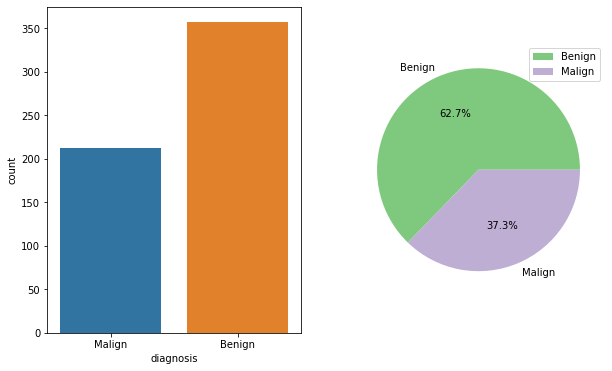

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x="diagnosis",ax=axes[0],data=data)
color_palette = colors = sns.color_palette('Accent')
counts = data_y.value_counts()
axes[1].pie(counts, labels = counts.index, colors=color_palette,autopct='%1.1f%%')
axes[1].legend()

<AxesSubplot:>

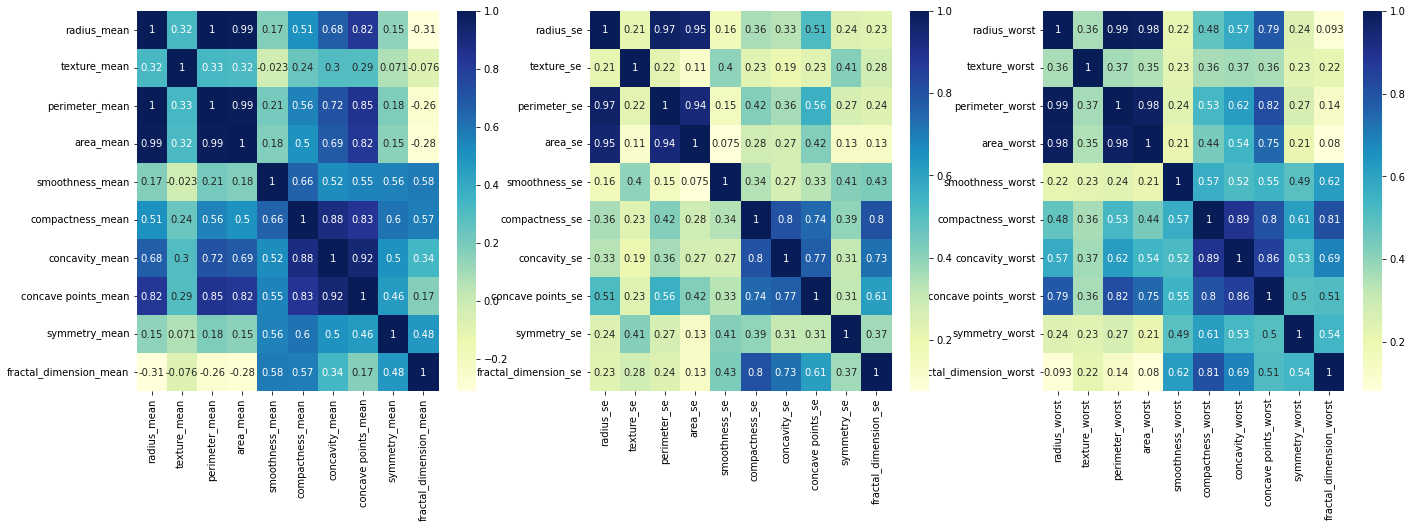

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(23, 7))
sns.heatmap(data_x_mean.corr(), ax=axes[0], annot=True, cmap="YlGnBu")
sns.heatmap(data_x_se.corr(), ax=axes[1], annot=True, cmap="YlGnBu")
sns.heatmap(data_x_worst.corr(), ax=axes[2], annot=True, cmap="YlGnBu")

### As we can see from the heatmap above, radius, perimeter and area is correlated as expected.

<AxesSubplot:>

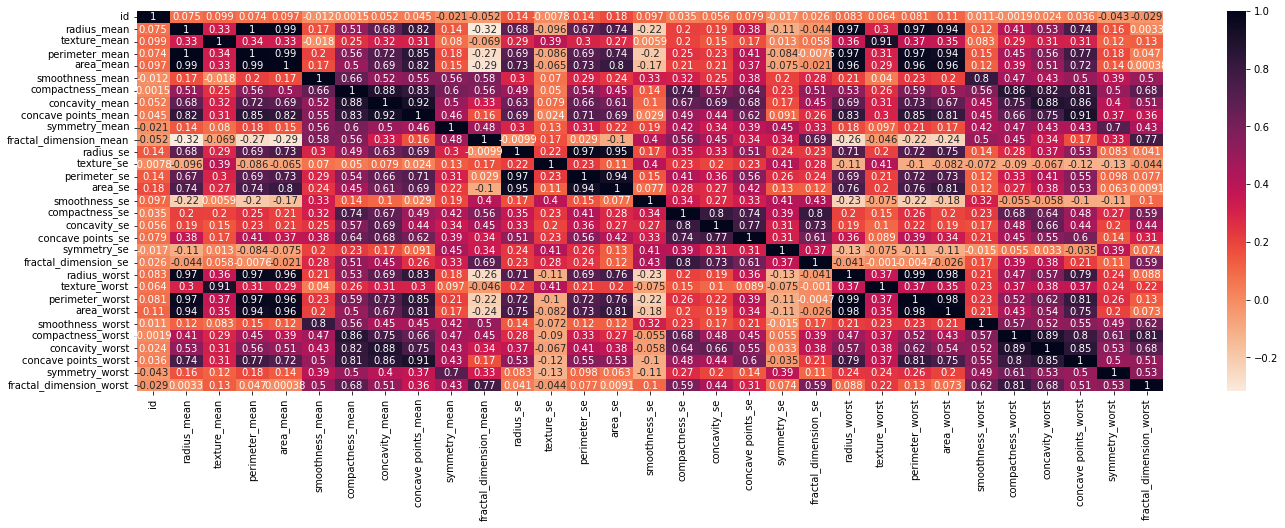

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(23, 7))
sns.heatmap(data.iloc[1:,:].corr(), ax=axes, annot=True, cmap="rocket_r")

In [7]:
# Printing the 10 features that correlates with diagnosis at the most
corr = data.corr()
print(corr.iloc[1,:].nlargest(10))

radius_mean             1.000000
perimeter_mean          0.997855
area_mean               0.987357
radius_worst            0.969539
perimeter_worst         0.965137
area_worst              0.941082
concave points_mean     0.822529
concave points_worst    0.744214
area_se                 0.735864
radius_se               0.679090
Name: radius_mean, dtype: float64


In [8]:
# Printing mean values of features grouped by rows diagnosis value
data.iloc[:,1:].groupby('diagnosis').mean().T

diagnosis,Benign,Malign
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


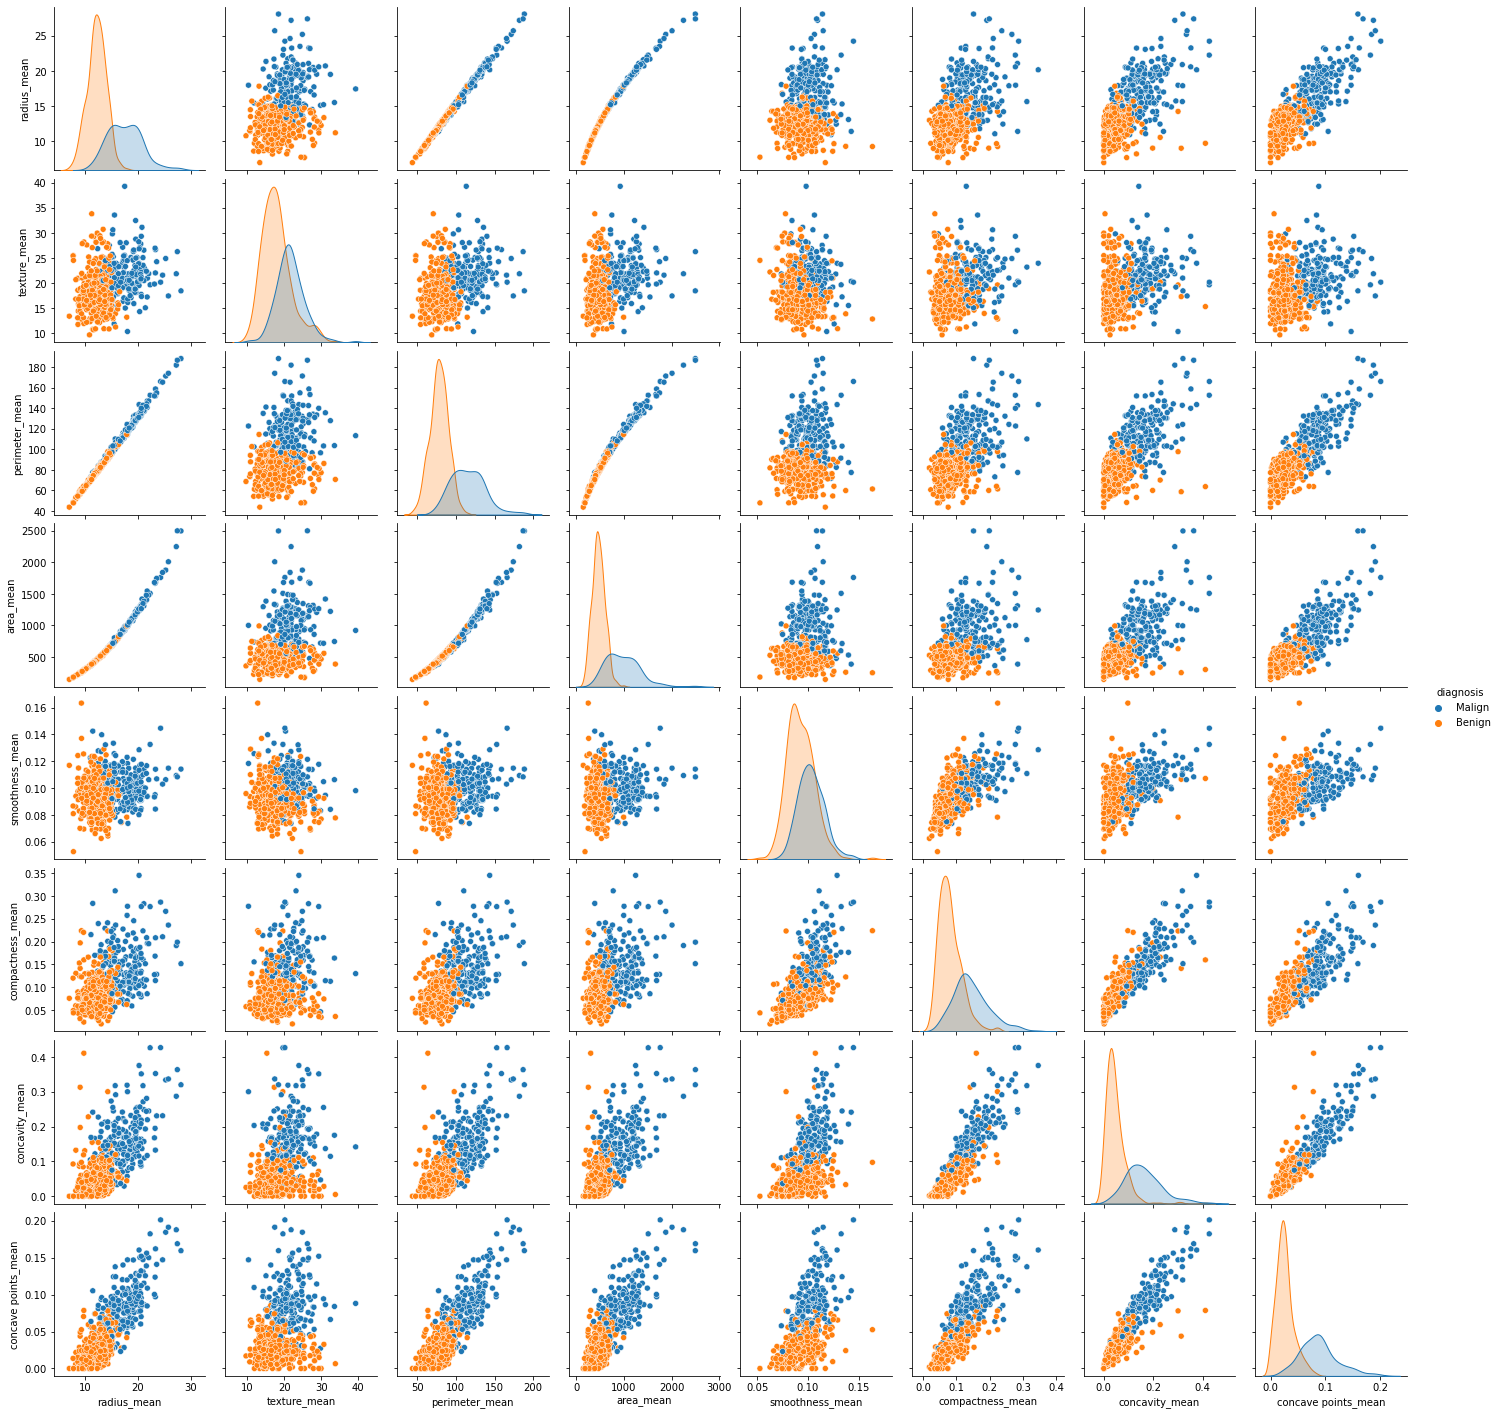

In [9]:
sns.pairplot(data.iloc[:, 1:10] , hue ='diagnosis')
plt.show()

## 2.Part

In [10]:
new_data = pd.concat([data_x, data_y], axis=1)
new_data['diagnosis'] = new_data['diagnosis'].map({'Malign':1,'Benign':0})
#new_data.head().T
new_data.iloc[:,:-1].head().T

,0,1,2,3,4
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
def calculate_metrics(y_test,y_pred):
    f1_sc = f1_score(y_test, y_pred)
    acc_sc = accuracy_score(y_test, y_pred)
    rec_sc = recall_score(y_test, y_pred)
    prec_sc = precision_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf.ravel()
    print(" accuracy:" + str((tn+tp)/(tp+tn+fp+fn)))
    res = " accuracy score: {}\n recall_score: {}\n precision_score: {}\n f1_score: {}"
    print(res.format(acc_sc, rec_sc, prec_sc, prec_sc, f1_sc))
    
    return conf
    

all mean features used:
 accuracy:0.956140350877193
 accuracy score: 0.956140350877193
 recall_score: 0.9069767441860465
 precision_score: 0.975
 f1_score: 0.975


<AxesSubplot:>

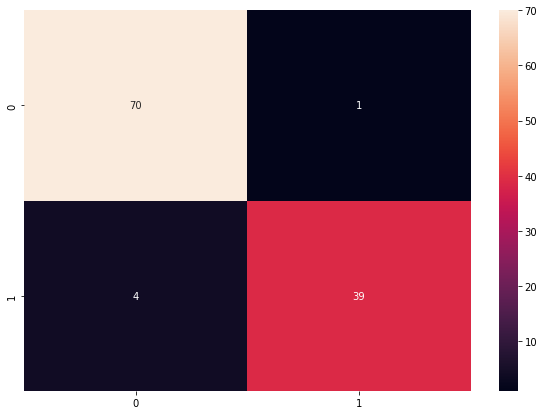

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2

X_train, X_test, y_train, y_test = train_test_split(new_data.iloc[:,:-1], new_data.iloc[:,-1], test_size=0.2, random_state=42)
svc = SVC(kernel="linear", degree=2)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print("all mean features used:")
conf = calculate_metrics(y_test,y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
sns.heatmap(conf, annot=True)

only the best 15 feature selected by their ch2 score:
 accuracy:0.9736842105263158
 accuracy score: 0.9736842105263158
 recall_score: 0.9534883720930233
 precision_score: 0.9761904761904762
 f1_score: 0.9761904761904762


<AxesSubplot:title={'center':'Confusion Matrix'}>

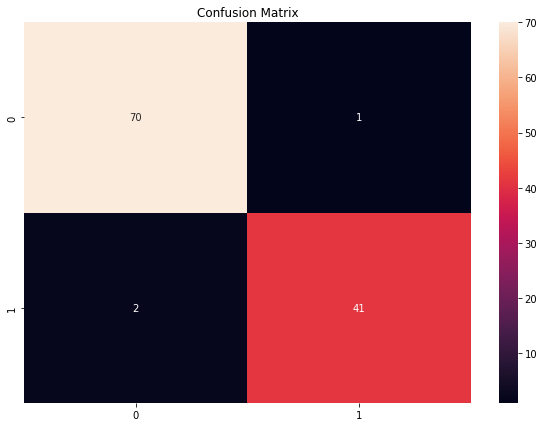

In [13]:
print("only the best 15 feature selected by their ch2 score:")
x_new = SelectKBest(score_func=chi2, k=10).fit_transform(new_data.iloc[:,:-1], new_data.iloc[:,-1])
x_new.shape, y_train.shape
X_train, X_test, y_train, y_test = train_test_split(x_new, new_data.iloc[:,-1], test_size=0.2, random_state=42)

svc = SVC(kernel="linear", degree=2)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
conf = calculate_metrics(y_test,y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
sns.heatmap(conf, annot=True)